In [2]:
import os
import time
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import mpl_toolkits.axes_grid1
from matplotlib.gridspec import GridSpec
from matplotlib.colors import to_rgba
# divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
# cax = divider.append_axes('right', '5%', pad='3%')

from datetime import datetime    
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 15
plt.rcParams['figure.dpi'] = 300
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

import pandas as pd

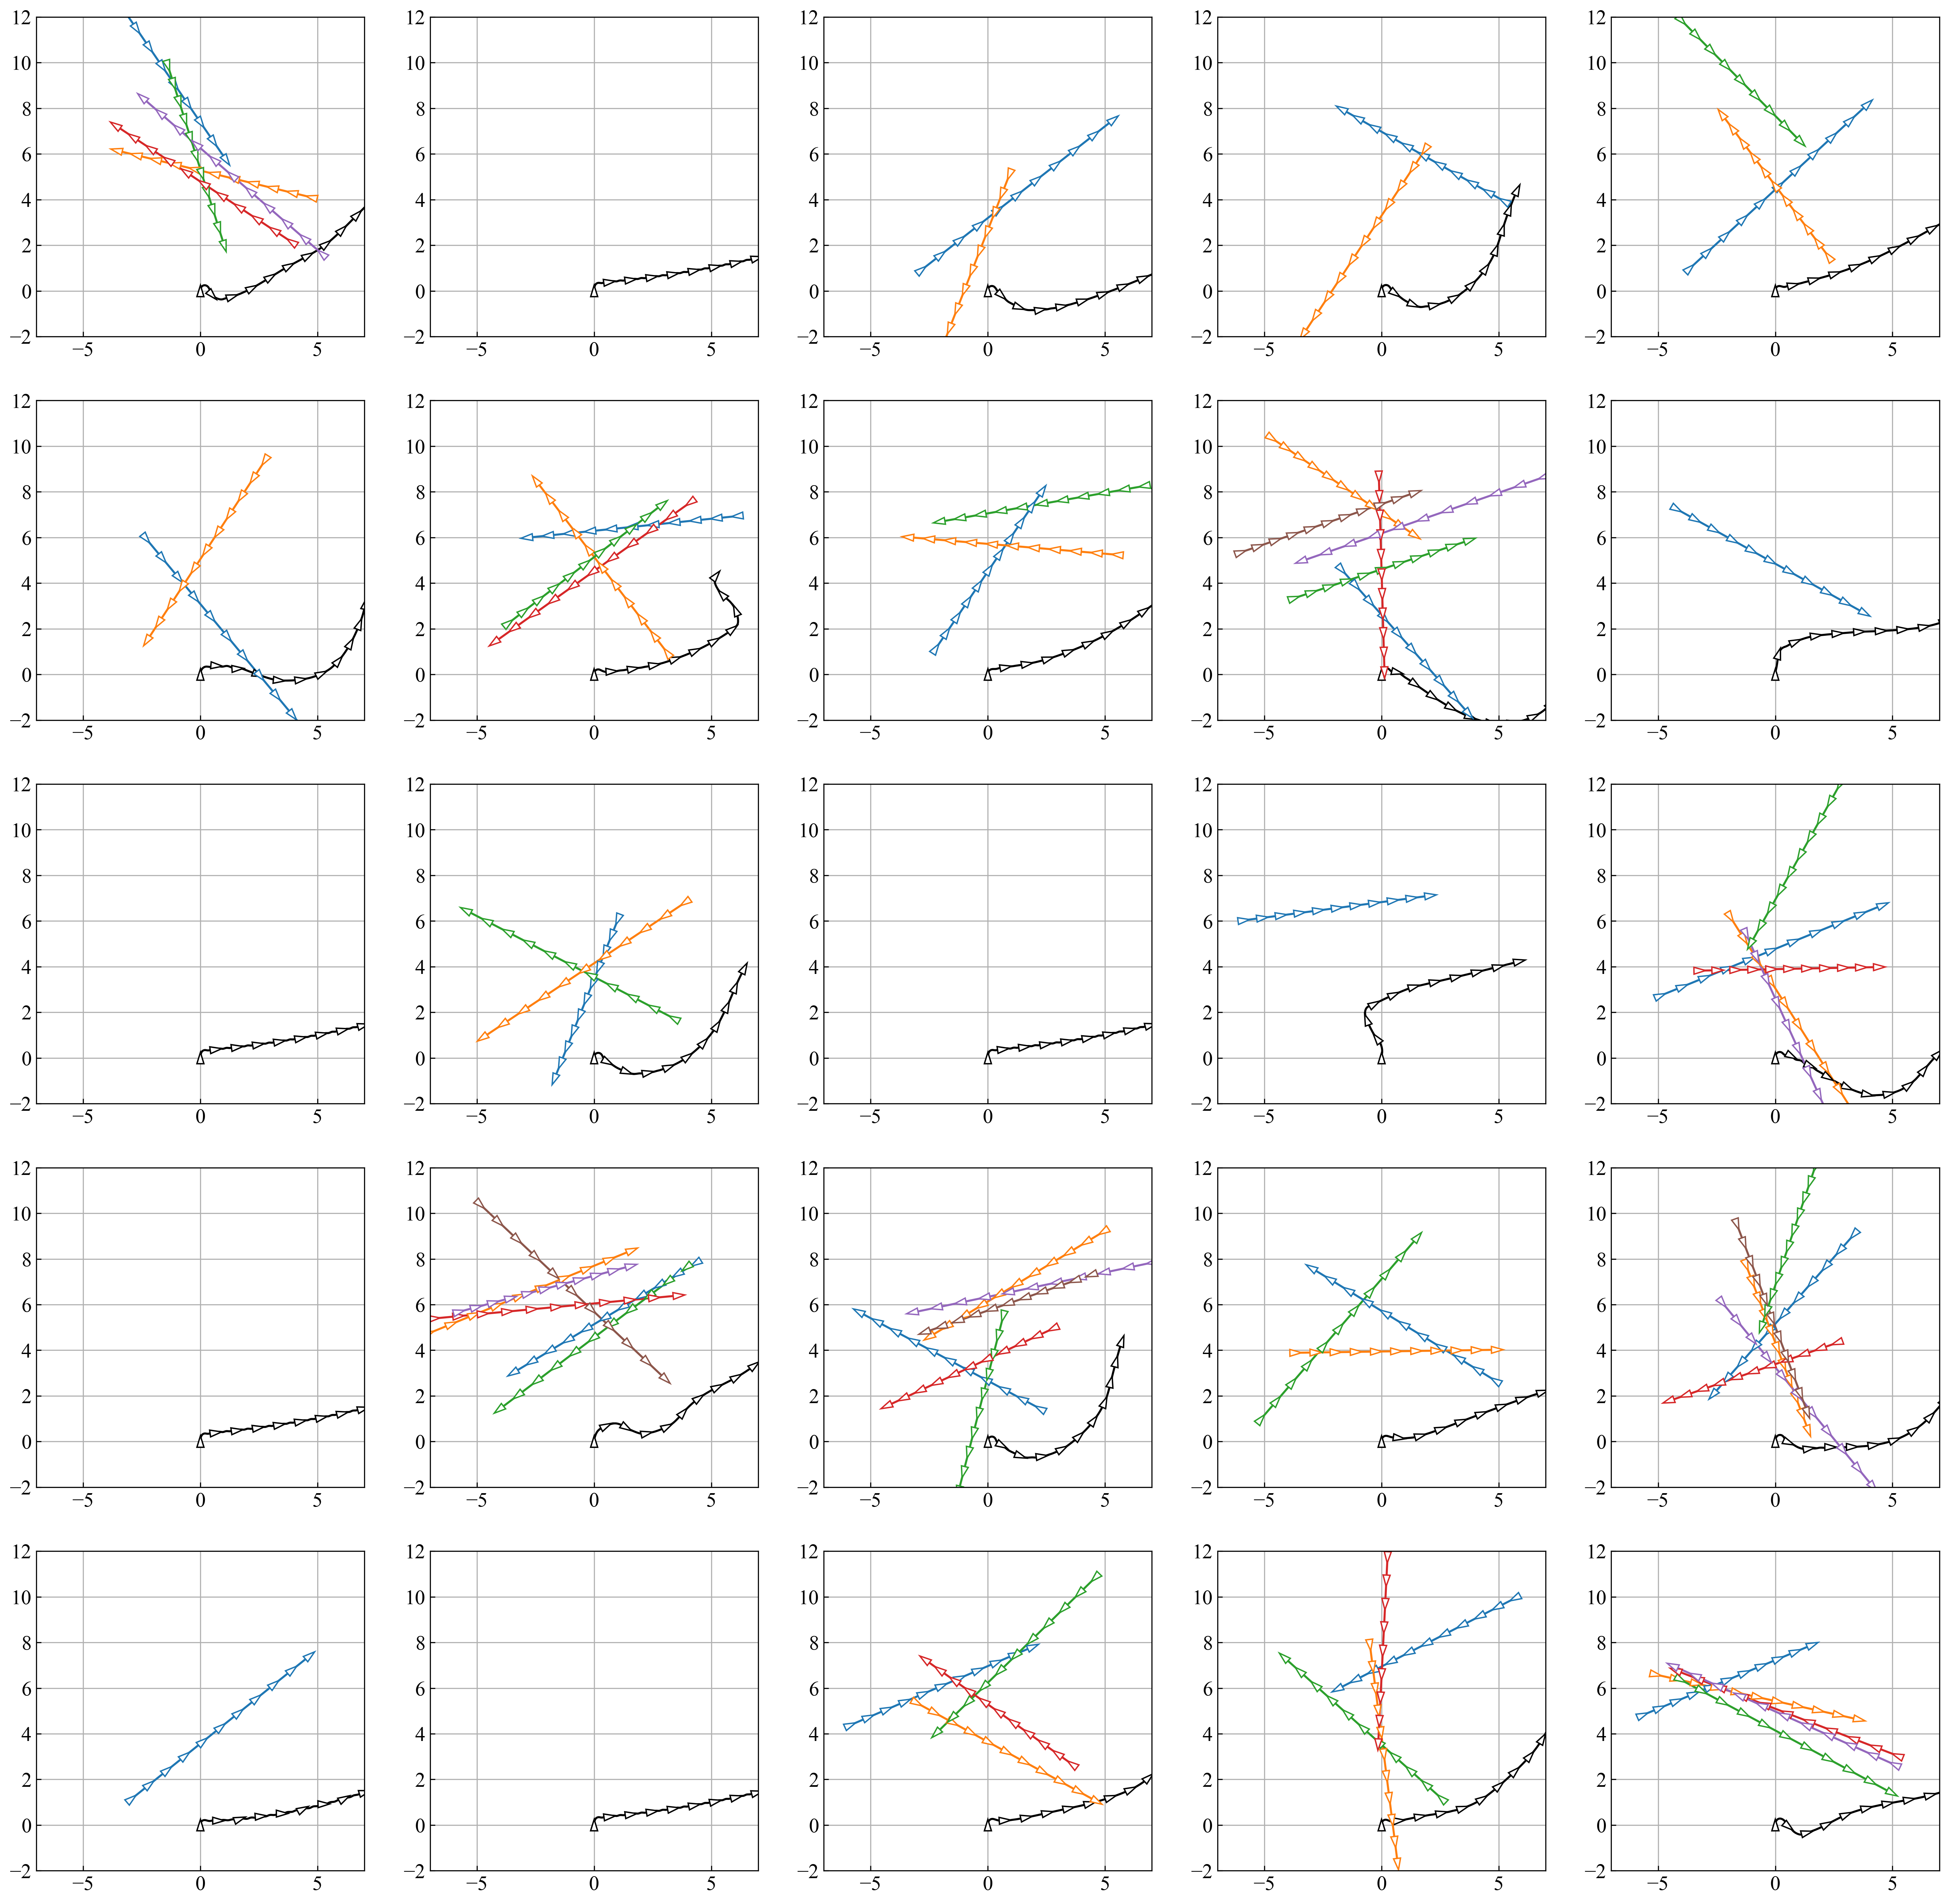

In [3]:
for dir in glob('test*'):
    files = glob(dir+'/*.csv')
    files

    fig, axes = plt.subplots(5,5,figsize=(25,25))

    for file_idx, ax in zip(range(25),axes.flatten()):
        df = pd.read_csv(files[file_idx])
        oth_num = int((len(df.columns)-4)/28-1)

        cmap = plt.get_cmap('tab10')
        marker_size=0.5
        # axes[0]
        ax.plot(
            df['own_x'],
            df['own_y'],
            color=(0,0,0), zorder=1
        )
        for i in np.linspace(0,len(df)-1,11).astype('int'):
            ax.add_patch(
                plt.Polygon(
                    [
                        [
                            df['own_x'].iloc[i] + marker_size*(
                                _x*np.cos(-np.radians(df['own_hdg'].iloc[i]))
                                - _y*np.sin(-np.radians(df['own_hdg'].iloc[i]))
                            ),
                            df['own_y'].iloc[i] + marker_size*(
                                _x*np.sin(-np.radians(df['own_hdg'].iloc[i]))
                                + _y*np.cos(-np.radians(df['own_hdg'].iloc[i]))
                            ),
                        ]
                        for _x, _y in zip(
                            [-0.3, 0.0, 0.3],
                            [-0.5, 0.5,-0.5]
                        )
                    ], ec=(0,0,0), fc='white', zorder=2
                )
            )
        for oth_idx in range(oth_num):
            ax.plot(
                df[f'oth{oth_idx:02d}_x'],
                df[f'oth{oth_idx:02d}_y'],
                color=cmap(oth_idx/10), zorder=1
            )
            for i in np.linspace(0,len(df)-1,11).astype('int'):
                ax.add_patch(
                    plt.Polygon(
                        [
                            [
                                df[f'oth{oth_idx:02d}_x'].iloc[i] + marker_size*(
                                    _x*np.cos(-np.radians(df[f'oth{oth_idx:02d}_hdg'].iloc[i]))
                                    - _y*np.sin(-np.radians(df[f'oth{oth_idx:02d}_hdg'].iloc[i]))
                                ),
                                df[f'oth{oth_idx:02d}_y'].iloc[i] + marker_size*(
                                    _x*np.sin(-np.radians(df[f'oth{oth_idx:02d}_hdg'].iloc[i]))
                                    + _y*np.cos(-np.radians(df[f'oth{oth_idx:02d}_hdg'].iloc[i]))
                                ),
                            ]
                            for _x, _y in zip(
                                [-0.3, 0.0, 0.3],
                                [-0.5, 0.5,-0.5]
                            )
                        ], ec=cmap(oth_idx/10), fc='white', zorder=2
                    )
                )
        ax.set_xlim(-7,7)
        ax.set_ylim(-2,12)
        ax.grid()
    fig.savefig(dir+'.jpeg')

In [4]:
_cmap = plt.get_cmap('jet')
def plot_gradation(ax,x,y,c,_cmin,_cmax):
    _mins = np.linspace(_cmin,_cmax,11)[:-1]
    _maxs = np.linspace(_cmin,_cmax,11)[1:]
    ax.plot(
        [x[:-1][c>=_maxs[0]], x[1:][c>=_maxs[0]]],
        [y[:-1][c>=_maxs[0]], y[1:][c>=_maxs[0]]],
        color=_cmap( np.clip(((_mins[0]+_maxs[0])/2 - _cmin)/(_cmax-_cmin),0,1) ),
        linewidth=0.6
    )
    for _min, _max in zip(
        _mins[1:-1], _maxs[1:-1],
    ):
        ax.plot(
            [x[:-1][(c<=_min)&(c>=_max)], x[1:][(c<=_min)&(c>=_max)]],
            [y[:-1][(c<=_min)&(c>=_max)], y[1:][(c<=_min)&(c>=_max)]],
            color=_cmap( np.clip(((_min+_max)/2 - _cmin)/(_cmax-_cmin),0,1) ),
            linewidth=0.6
        )
    ax.plot(
        [x[:-1][c<=_mins[-1]], x[1:][c<=_mins[-1]]],
        [y[:-1][c<=_mins[-1]], y[1:][c<=_mins[-1]]],
        color=_cmap( np.clip(((_mins[-1]+_maxs[-1])/2 - _cmin)/(_cmax-_cmin),0,1) ),
        linewidth=0.6
    )

def plot_traj(_file,ax,_color_bar_min,_color_bar_max):
    marker_size=0.5
    df = pd.read_csv(_file)
    df1 = df.iloc[:-1].reset_index()
    df2 = df.iloc[1:].reset_index()
    oth_idx=0
    while 1:
        if not f'oth{oth_idx:02d}_x' in df.columns:
            break
        plot_gradation(
            ax, np.array(df[f'oth{oth_idx:02d}_x'].values), np.array(df[f'oth{oth_idx:02d}_y'].values),
            np.array(df[f'Evalu{oth_idx:02d}_action'].values[1:]), _color_bar_min, _color_bar_max
        )
        for _idx in np.linspace(1,len(df[f'oth{oth_idx:02d}_x'])-1,11).astype('int'):
            marker_size = 0.4
            ax.add_patch(
                plt.Polygon(
                    [
                        [
                            df[f'oth{oth_idx:02d}_x'].iloc[_idx] + marker_size*(
                                _x*np.cos(np.radians(-df[f'oth{oth_idx:02d}_hdg'].iloc[_idx]))
                                - _y*np.sin(np.radians(-df[f'oth{oth_idx:02d}_hdg'].iloc[_idx]))
                            ),
                            df[f'oth{oth_idx:02d}_y'].iloc[_idx] + marker_size*(
                                _x*np.sin(np.radians(-df[f'oth{oth_idx:02d}_hdg'].iloc[_idx]))
                                + _y*np.cos(np.radians(-df[f'oth{oth_idx:02d}_hdg'].iloc[_idx]))
                            ),
                        ] for _x, _y in zip(
                            [-0.3,0.0, 0.3],
                            [-0.5,0.5,-0.5]
                        )
                    ],
                    # facecolor='white',
                    facecolor=_cmap( (df[f'Evalu{oth_idx:02d}_action'].iloc[_idx] - _color_bar_min)/(_color_bar_max-_color_bar_min) ),
                    edgecolor=_cmap( (df[f'Evalu{oth_idx:02d}_action'].iloc[_idx] - _color_bar_min)/(_color_bar_max-_color_bar_min) ),
                    zorder=2, linewidth=0.6
                )
            )
        oth_idx+=1

    ax.plot(
        df['own_x'], df['own_y'], color='black',zorder=3
    )
    for _idx in np.linspace(0,len(df[f'own_x'])-1,11).astype('int'):
        marker_size = 0.6
        ax.add_patch(
            plt.Polygon(
                [
                    [
                        df[f'own_x'].iloc[_idx] + marker_size*(
                            _x*np.cos(np.radians(-df[f'own_hdg'].iloc[_idx]))
                            - _y*np.sin(np.radians(-df[f'own_hdg'].iloc[_idx]))
                        ),
                        df[f'own_y'].iloc[_idx] + marker_size*(
                            _x*np.sin(np.radians(-df[f'own_hdg'].iloc[_idx]))
                            + _y*np.cos(np.radians(-df[f'own_hdg'].iloc[_idx]))
                        ),
                    ] for _x, _y in zip(
                        [-0.3,0.0, 0.3],
                        [-0.5,0.5,-0.5]
                    )
                ], facecolor='white', edgecolor='black', zorder=4
            )
        )
    xmin,xmax,ymin,ymax=min(df['own_x']),max(df['own_x']),min(df['own_y']),max(df['own_y'])
    wide = max([xmax-xmin,ymax-ymin])
    ax.grid()
    ax.set_xlim(-5.5, 5.5)
    ax.set_ylim(-1,10)
    ax.set_aspect(1)

def plot_traj_rel(_file,ax,_color_bar_min,_color_bar_max):
    marker_size=0.5
    df = pd.read_csv(_file)
    oth_idx=0
    while 1:
        if not f'oth{oth_idx:02d}_x' in df.columns:
            break
        _relx = (
            (np.array(df[f'oth{oth_idx:02d}_x'].values) - np.array(df['own_x'].values))*np.cos(np.radians(np.array(df[f'own_hdg'].values)))
            - (np.array(df[f'oth{oth_idx:02d}_y'].values) - np.array(df['own_y'].values))*np.sin(np.radians(np.array(df[f'own_hdg'].values)))
        )
        _rely = (
            (np.array(df[f'oth{oth_idx:02d}_x'].values) - np.array(df['own_x'].values))*np.sin(np.radians(np.array(df[f'own_hdg'].values)))
            + (np.array(df[f'oth{oth_idx:02d}_y'].values) - np.array(df['own_y'].values))*np.cos(np.radians(np.array(df[f'own_hdg'].values)))
        )
        _relcog = np.array(df[f'oth{oth_idx:02d}_hdg'].values) - np.array(df[f'own_hdg'].values)
        plot_gradation(
            ax,
            _relx,
            _rely,
            np.array(df[f'Evalu{oth_idx:02d}_action'].values[1:]),
            _color_bar_min, _color_bar_max
        )
        for _idx in np.linspace(1,len(df[f'oth{oth_idx:02d}_x'])-1,11).astype('int'):
            marker_size = 0.4
            ax.add_patch(
                plt.Polygon(
                    [
                        [
                            _relx[_idx] + marker_size*(
                                _x*np.cos(np.radians(-_relcog[_idx]))
                                - _y*np.sin(np.radians(-_relcog[_idx]))
                            ),
                            _rely[_idx] + marker_size*(
                                _x*np.sin(np.radians(-_relcog[_idx]))
                                + _y*np.cos(np.radians(-_relcog[_idx]))
                            ),
                        ] for _x, _y in zip(
                            [-0.3,0.0, 0.3],
                            [-0.5,0.5,-0.5]
                        )
                    ],
                    # facecolor='white',
                    facecolor=_cmap( (df[f'Evalu{oth_idx:02d}_action'].iloc[_idx] - _color_bar_min)/(_color_bar_max-_color_bar_min) ),
                    edgecolor=_cmap( (df[f'Evalu{oth_idx:02d}_action'].iloc[_idx] - _color_bar_min)/(_color_bar_max-_color_bar_min) ),
                    zorder=2, linewidth=0.6
                )
            )
        oth_idx+=1
    ax.plot(
        np.where(
            np.cos(np.linspace(0,np.pi*2,41))>=0,
            np.cos(np.linspace(0,np.pi*2,41))*3.2*0.34,
            np.cos(np.linspace(0,np.pi*2,41))*1.6*0.34,
        ),
        np.where(
            np.sin(np.linspace(0,np.pi*2,41))>=0,
            np.sin(np.linspace(0,np.pi*2,41))*6.4*0.34,
            np.sin(np.linspace(0,np.pi*2,41))*1.6*0.34,
        ), color='black', linewidth=1.0
    )
    ax.add_patch(
        plt.Polygon(
            [
                [  marker_size*_x, marker_size*_y  ] for _x, _y in zip(
                    [-0.3,0.0, 0.3],
                    [-0.5,0.5,-0.5]
                )
            ],
            # facecolor='white',
            facecolor='white',
            edgecolor='black',
            zorder=2, linewidth=1.0
        )
    )
    xmin,xmax,ymin,ymax=-3.5,3.5,-2,5
    wide = max([xmax-xmin,ymax-ymin])
    ax.grid()
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_aspect(1)

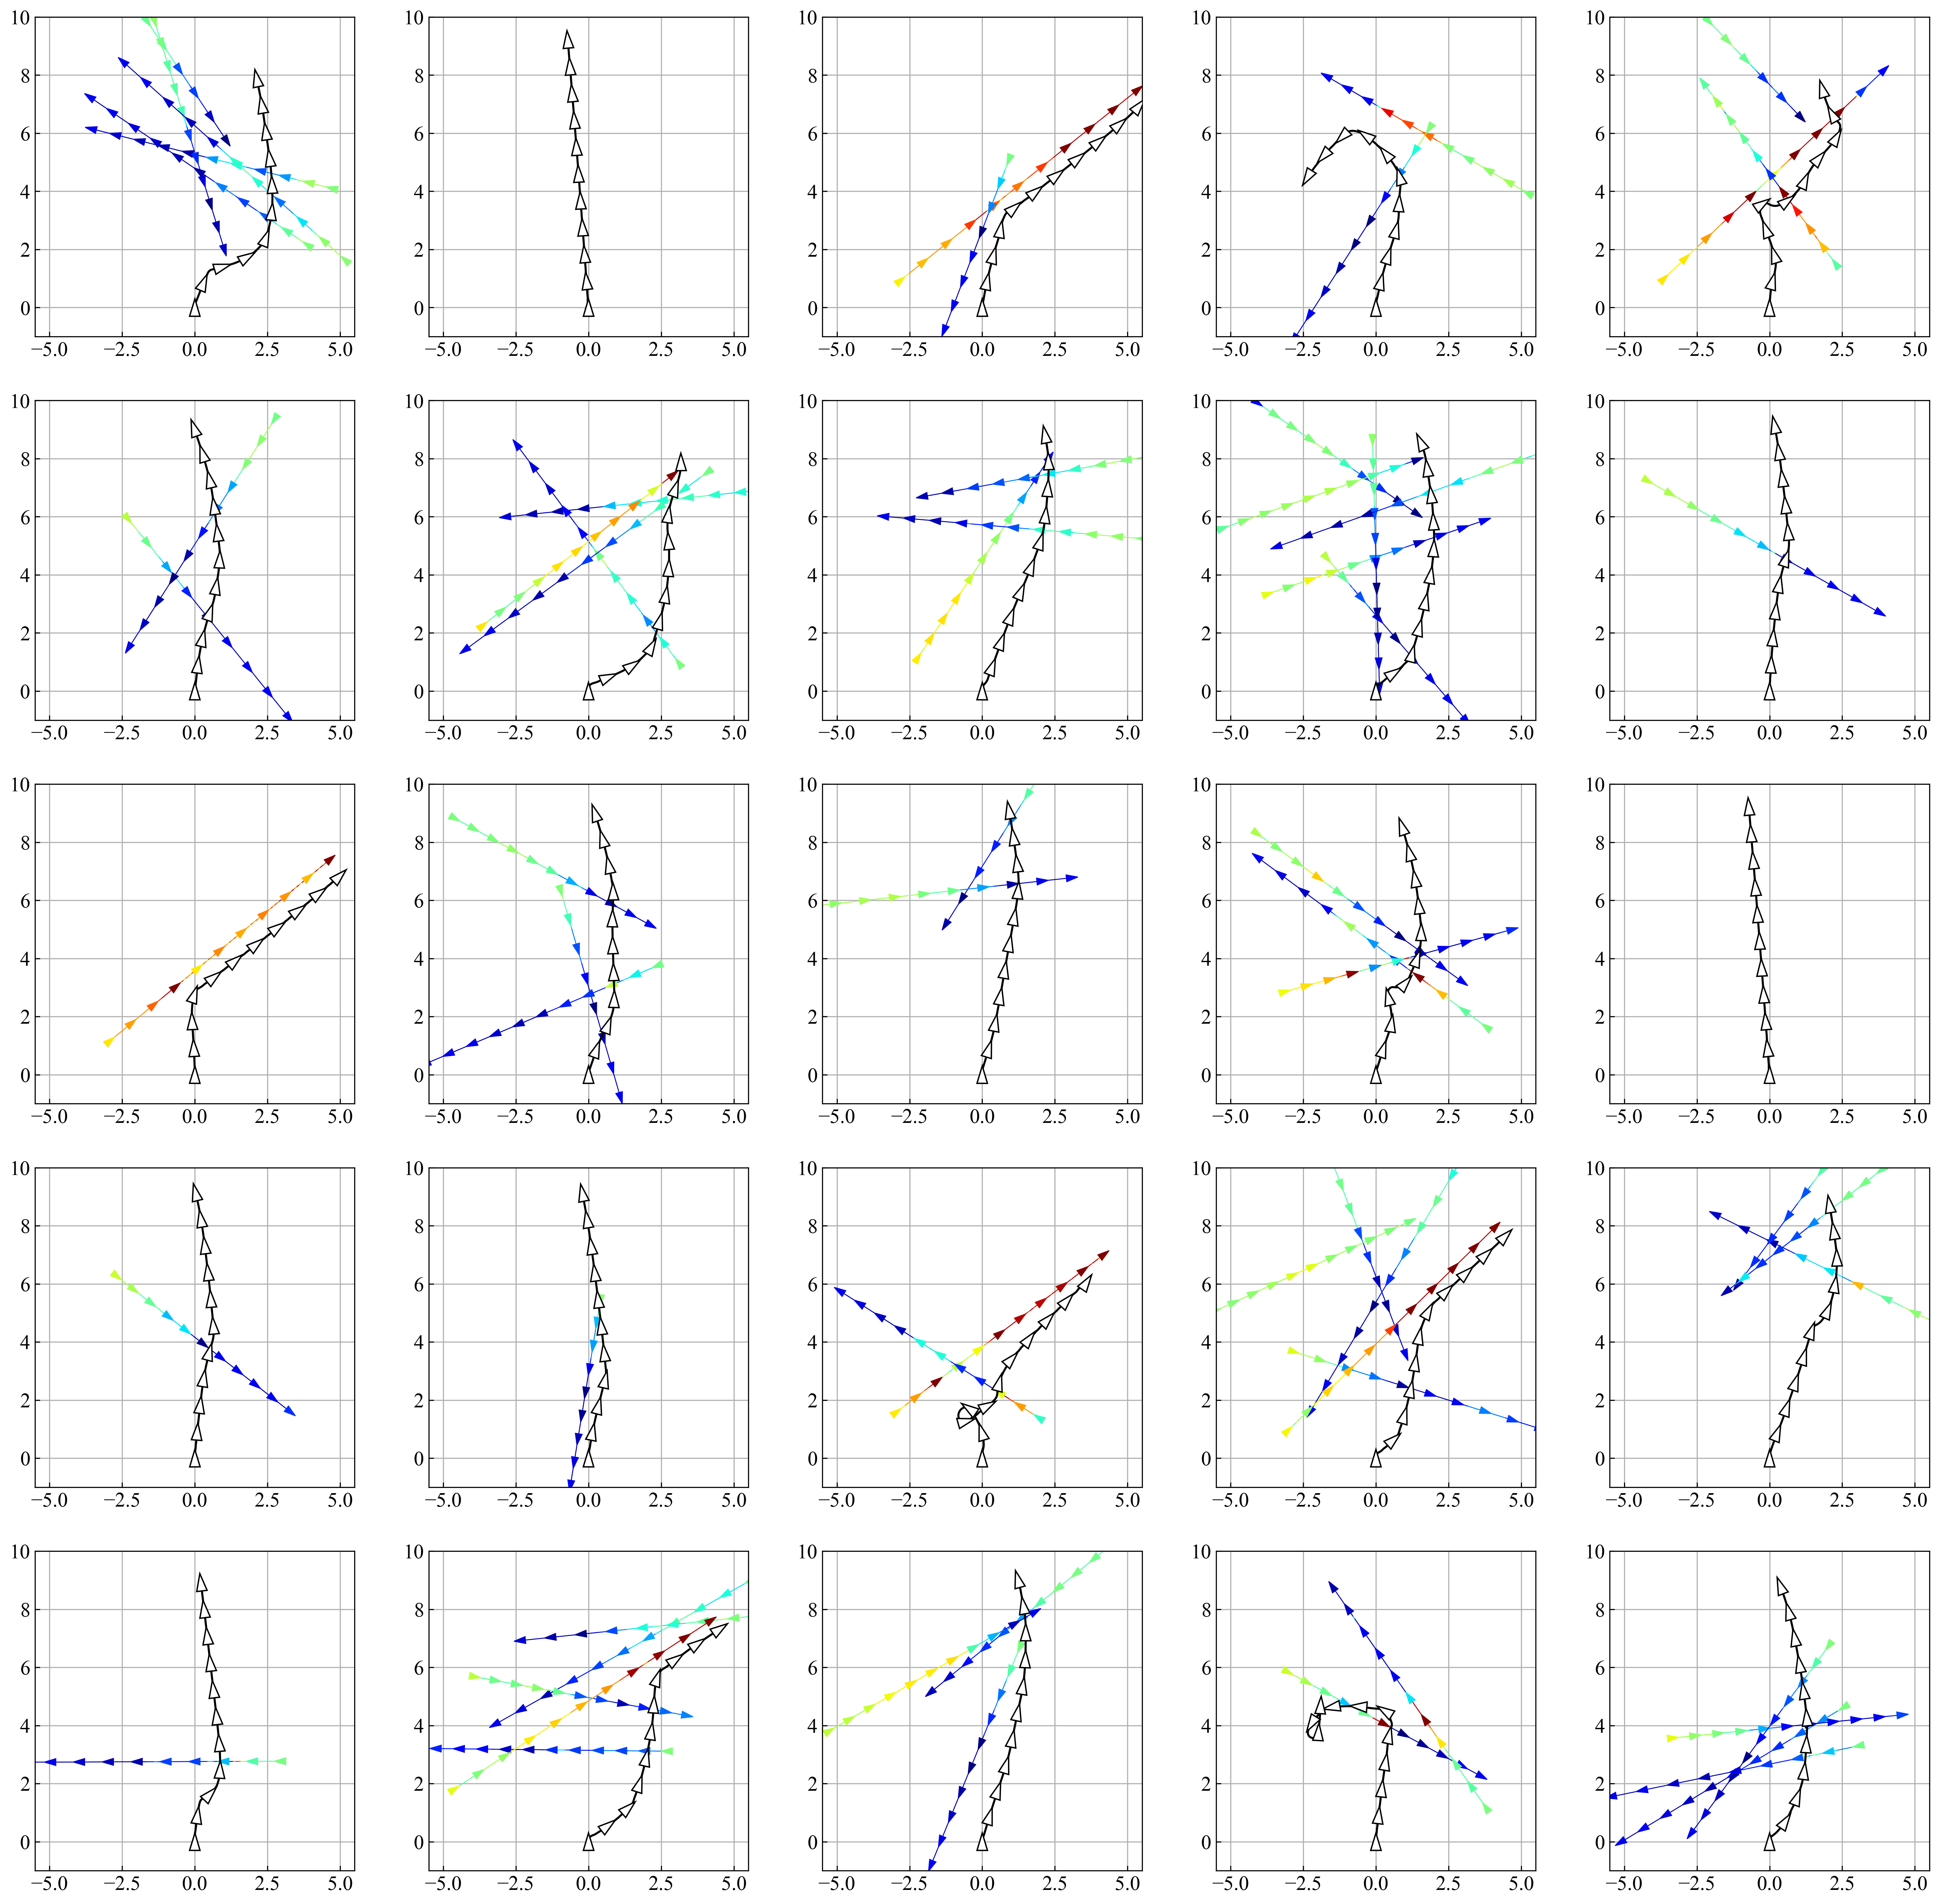

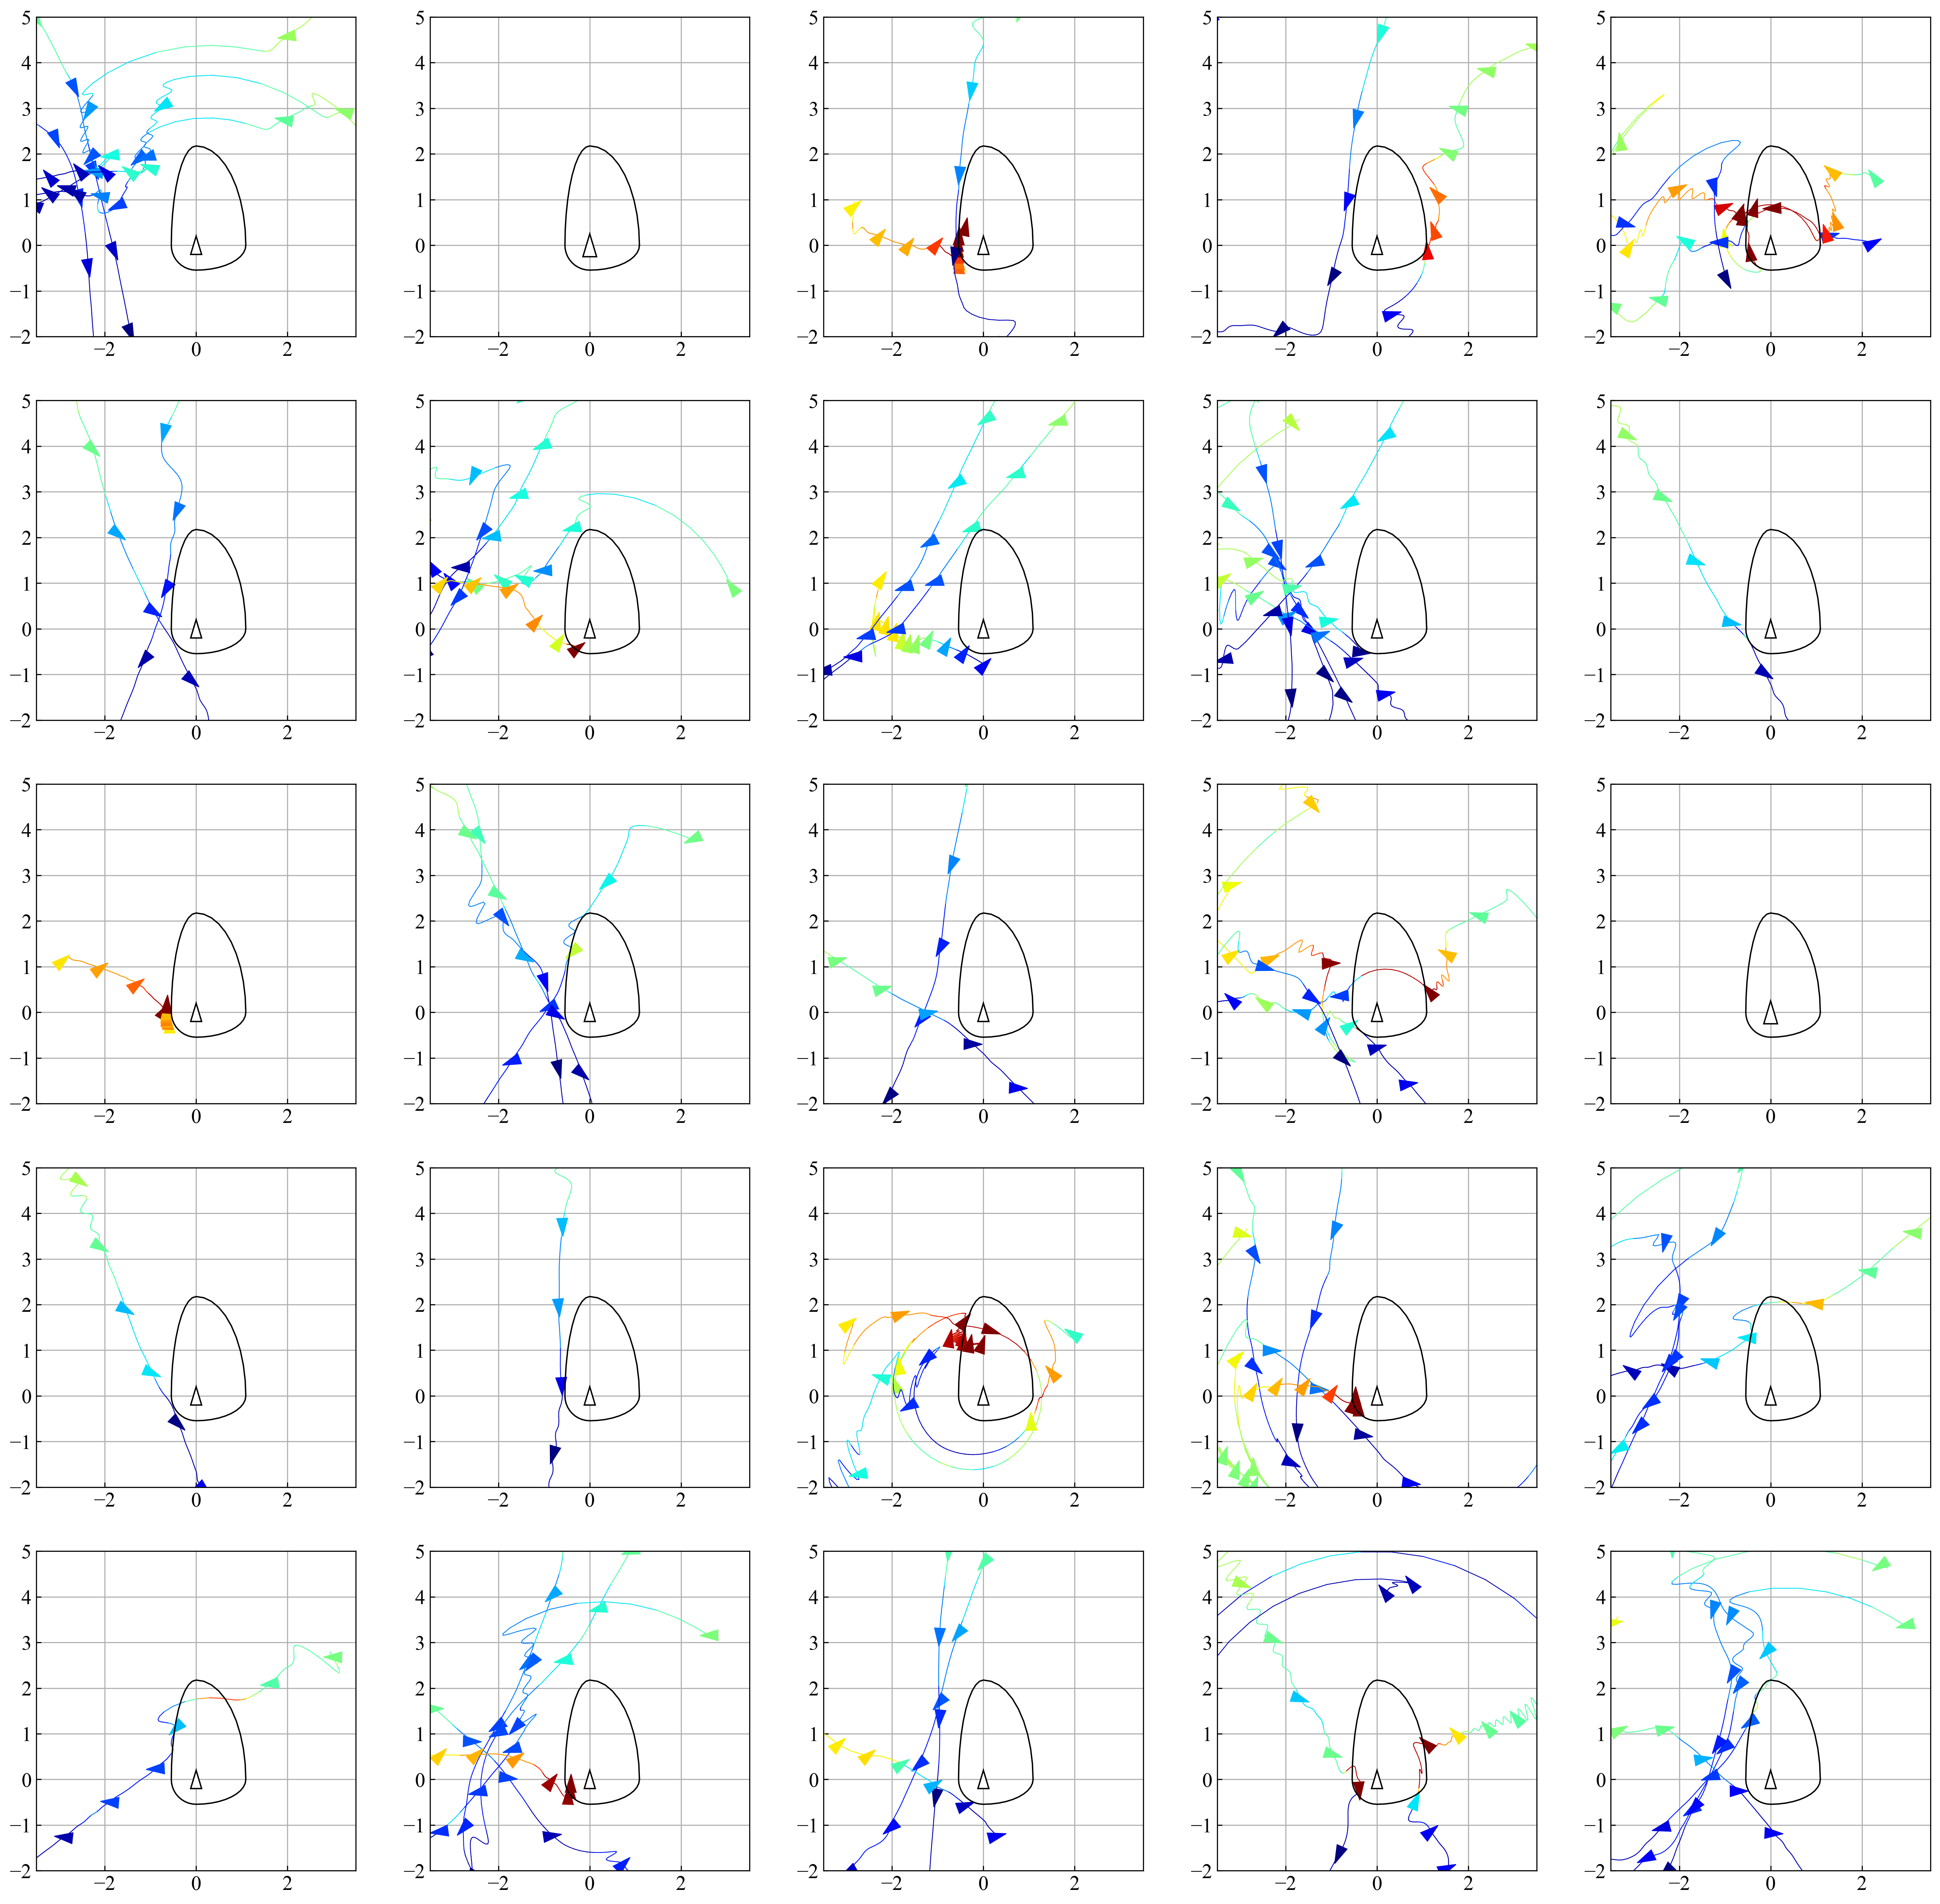

In [5]:
fig, axes = plt.subplots(5,5,figsize=(25,25))
for file_idx, ax in zip(range(25),axes.flatten()):
    plot_traj(files[file_idx],ax,0,-2)

fig, axes = plt.subplots(5,5,figsize=(25,25))
for file_idx, ax in zip(range(25),axes.flatten()):
    plot_traj_rel(files[file_idx],ax,0,-2)

In [6]:
from matplotlib.animation import FuncAnimation

In [7]:
for file_idx in range(len(files)):
    df = pd.read_csv(files[file_idx])
    oth_num = int((len(df.columns)-4)/28-1)

    fig = plt.figure(figsize=(15,8))
    gs = GridSpec(ncols=2,nrows=4)
    axes = [
        fig.add_subplot(gs[:,0]),
        fig.add_subplot(gs[0,1]),
        fig.add_subplot(gs[1,1]),
        fig.add_subplot(gs[2,1]),
        fig.add_subplot(gs[3,1]),
    ]
    cmap = plt.get_cmap('tab10')
    marker_size=0.5
    def update(i):
        [ax.cla() for ax in axes]
        # axes[0]
        axes[0].plot(
            df['own_x'].iloc[:i],
            df['own_y'].iloc[:i],
            color=(0,0,0), zorder=1
        )
        axes[0].add_patch(
            plt.Polygon(
                [
                    [
                        df['own_x'].iloc[i] + marker_size*(
                            _x*np.cos(-np.radians(df['own_hdg'].iloc[i]))
                            - _y*np.sin(-np.radians(df['own_hdg'].iloc[i]))
                        ),
                        df['own_y'].iloc[i] + marker_size*(
                            _x*np.sin(-np.radians(df['own_hdg'].iloc[i]))
                            + _y*np.cos(-np.radians(df['own_hdg'].iloc[i]))
                        ),
                    ]
                    for _x, _y in zip(
                        [-0.3, 0.0, 0.3],
                        [-0.5, 0.5,-0.5]
                    )
                ], ec=(0,0,0), fc='white', zorder=2
            )
        )
        for oth_idx in range(oth_num):
            axes[0].plot(
                df[f'oth{oth_idx:02d}_x'].iloc[:i],
                df[f'oth{oth_idx:02d}_y'].iloc[:i],
                color=cmap(oth_idx/10), zorder=1
            )
            axes[0].add_patch(
                plt.Polygon(
                    [
                        [
                            df[f'oth{oth_idx:02d}_x'].iloc[i] + marker_size*(
                                _x*np.cos(-np.radians(df[f'oth{oth_idx:02d}_hdg'].iloc[i]))
                                - _y*np.sin(-np.radians(df[f'oth{oth_idx:02d}_hdg'].iloc[i]))
                            ),
                            df[f'oth{oth_idx:02d}_y'].iloc[i] + marker_size*(
                                _x*np.sin(-np.radians(df[f'oth{oth_idx:02d}_hdg'].iloc[i]))
                                + _y*np.cos(-np.radians(df[f'oth{oth_idx:02d}_hdg'].iloc[i]))
                            ),
                        ]
                        for _x, _y in zip(
                            [-0.3, 0.0, 0.3],
                            [-0.5, 0.5,-0.5]
                        )
                    ], ec=cmap(oth_idx/10), fc='white', zorder=2
                )
            )
        axes[0].set_xlim(-8, 8)
        axes[0].set_ylim(-2,14)
        axes[0].set_aspect(1)
        axes[0].set_xlabel('X[km]')
        axes[0].set_ylabel('Y[km]')
        axes[0].grid()

        # axes[1]
        actions = np.linspace(-1,1,21)
        q_vals = np.array([ df[f'Evalu_wp_{_a:.1f}'].iloc[i] for _a in actions])
        axes[1].axvline(x=df['own_rudder'].iloc[i],ymin=0,ymax=1,color='gray',linestyle='dashed')
        axes[1].plot(
            actions*5, q_vals - q_vals[10], color=(0,0,0)
        )
        for oth_idx in range(oth_num):
            q_vals = np.array([ df[f'Evalu{oth_idx:02d}_{_a:.1f}'].iloc[i] for _a in actions])
            axes[1].plot(
                actions*5,
                q_vals - q_vals[10],
                color=cmap(oth_idx/10)
            )
        axes[1].grid()
        axes[1].set_title('$Q(s_{t},a)$', fontsize=15)

        # axes[2]
        ylim=5
        axes[2].add_patch(
            plt.Polygon(
                [
                    [0,0],
                    [0,df['Evalu_wp_action'].iloc[i],],
                    [1,df['Evalu_wp_action'].iloc[i],],
                    [1,0,], [0,0]
                ], ec='black', fc=to_rgba('black',0.5)
            )
        )
        axes[2].text(
            0.5,0,'own',ha='center',
            va='top' if df['Evalu_wp_action'].iloc[i]>=0 else 'bottom'
        )

        for oth_idx in range(oth_num):
            axes[2].add_patch(
                plt.Polygon(
                    [
                        [1+oth_idx,0],
                        [1+oth_idx,df[f'Evalu{oth_idx:02d}_action'].iloc[i],],
                        [2+oth_idx,df[f'Evalu{oth_idx:02d}_action'].iloc[i],],
                        [2+oth_idx,0,], [1+oth_idx,0]
                    ], ec=cmap(oth_idx/10), fc=to_rgba(cmap(oth_idx/10),0.5)
                )
            )
            axes[2].text(
                oth_idx+1.5,0,f'oth{oth_idx:02d}',ha='center',
                va='top' if df[f'Evalu{oth_idx:02d}_action'].iloc[i]>=0 else 'bottom'
            )
        axes[2].set_xlim(-0.5,7.5)
        axes[2].set_ylim(-ylim,ylim)
        axes[2].set_xticks(range(8))
        axes[2].set_xticklabels(['' for _ in range(8)])
        axes[2].grid()
        axes[2].set_title('$Q(s_{t},a_{t})$', fontsize=15)

        # axes[3]
        ylim=0.05
        axes[3].add_patch(
            plt.Polygon(
                [
                    [0,0],
                    [0,df['Evalu_wp_action'].iloc[i]-df[f'Evalu_wp_{0.0:.1f}'].iloc[i],],
                    [1,df['Evalu_wp_action'].iloc[i]-df[f'Evalu_wp_{0.0:.1f}'].iloc[i],],
                    [1,0,], [0,0]
                ], ec='black', fc=to_rgba('black',0.5)
            )
        )
        axes[3].text(
            0.5,0,'own',ha='center',
            va='top' if df['Evalu_wp_action'].iloc[i]-df[f'Evalu_wp_{0.0:.1f}'].iloc[i]>=0 else 'bottom'
        )
        

        for oth_idx in range(oth_num):
            axes[3].add_patch(
                plt.Polygon(
                    [
                        [1+oth_idx,0],
                        [1+oth_idx,df[f'Evalu{oth_idx:02d}_action'].iloc[i]-df[f'Evalu{oth_idx:02d}_{0.0:.1f}'].iloc[i],],
                        [2+oth_idx,df[f'Evalu{oth_idx:02d}_action'].iloc[i]-df[f'Evalu{oth_idx:02d}_{0.0:.1f}'].iloc[i],],
                        [2+oth_idx,0,], [1+oth_idx,0]
                    ], ec=cmap(oth_idx/10), fc=to_rgba(cmap(oth_idx/10),0.5)
                )
            )
            axes[3].text(
                oth_idx+1.5,0,f'oth{oth_idx:02d}',ha='center',
                va='top' if df[f'Evalu{oth_idx:02d}_action'].iloc[i]-df[f'Evalu{oth_idx:02d}_{0.0:.1f}'].iloc[i]>=0 else 'bottom'
            )
        axes[3].set_xlim(-0.5,7.5)
        axes[3].set_ylim(-ylim,ylim)
        axes[3].set_xticks(range(8))
        axes[3].set_xticklabels(['' for _ in range(8)])
        axes[3].grid()
        axes[3].set_title('$Q(s_{t},a_{t})-Q(s_{t},0)$', fontsize=15)

        # axes[4]
        ylim=0.5
        val = df['Evalu_wp_action'].iloc[i]-min([df[f'Evalu_wp_{_a:.1f}'].iloc[i] for _a in np.linspace(-1,1,21)])
        axes[4].add_patch(
            plt.Polygon(
                [
                    [0,0],
                    [0,val,],
                    [1,val,],
                    [1,0,], [0,0]
                ], ec='black', fc=to_rgba('black',0.5)
            )
        )
        axes[4].text(
            0.5,0,'own',ha='center',
            va='top' if val>=0 else 'bottom'
        )
        
        for oth_idx in range(oth_num):
            val = df[f'Evalu{oth_idx:02d}_action'].iloc[i]-min([df[f'Evalu{oth_idx:02d}_{_a:.1f}'].iloc[i] for _a in np.linspace(-1,1,21)])
            axes[4].add_patch(
                plt.Polygon(
                    [
                        [1+oth_idx,0],
                        [1+oth_idx,val,],
                        [2+oth_idx,val,],
                        [2+oth_idx,0,], [1+oth_idx,0]
                    ], ec=cmap(oth_idx/10), fc=to_rgba(cmap(oth_idx/10),0.5)
                )
            )
            axes[4].text(
                oth_idx+1.5,0,f'oth{oth_idx:02d}',ha='center',
                va='top' if val>=0 else 'bottom'
            )
        axes[4].set_xlim(-0.5,7.5)
        axes[4].set_ylim(-ylim*0.2,ylim)
        axes[4].set_xticks(range(8))
        axes[4].set_xticklabels(['' for _ in range(8)])
        axes[4].grid()
        axes[4].set_title('$Q(s_{t},a_{t})-\min_{a}Q(s_{t},a)$', fontsize=15)

        fig.subplots_adjust(hspace=0.5)
    ani = FuncAnimation(fig,update,frames=range(len(df)),interval=100)
    # ani.save(
    #     files[file_idx].replace(
    #         '.csv', datetime.now().strftime('_%Y%m%d%H%M%S.mp4')
    #     )
    # )
    [ax.cla() for ax in axes]
    fig.clf()
    plt.close()

c:\Users\yoshioka\anaconda3\lib\site-packages\matplotlib\animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


c:\Users\yoshioka\anaconda3\lib\site-packages\matplotlib\animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


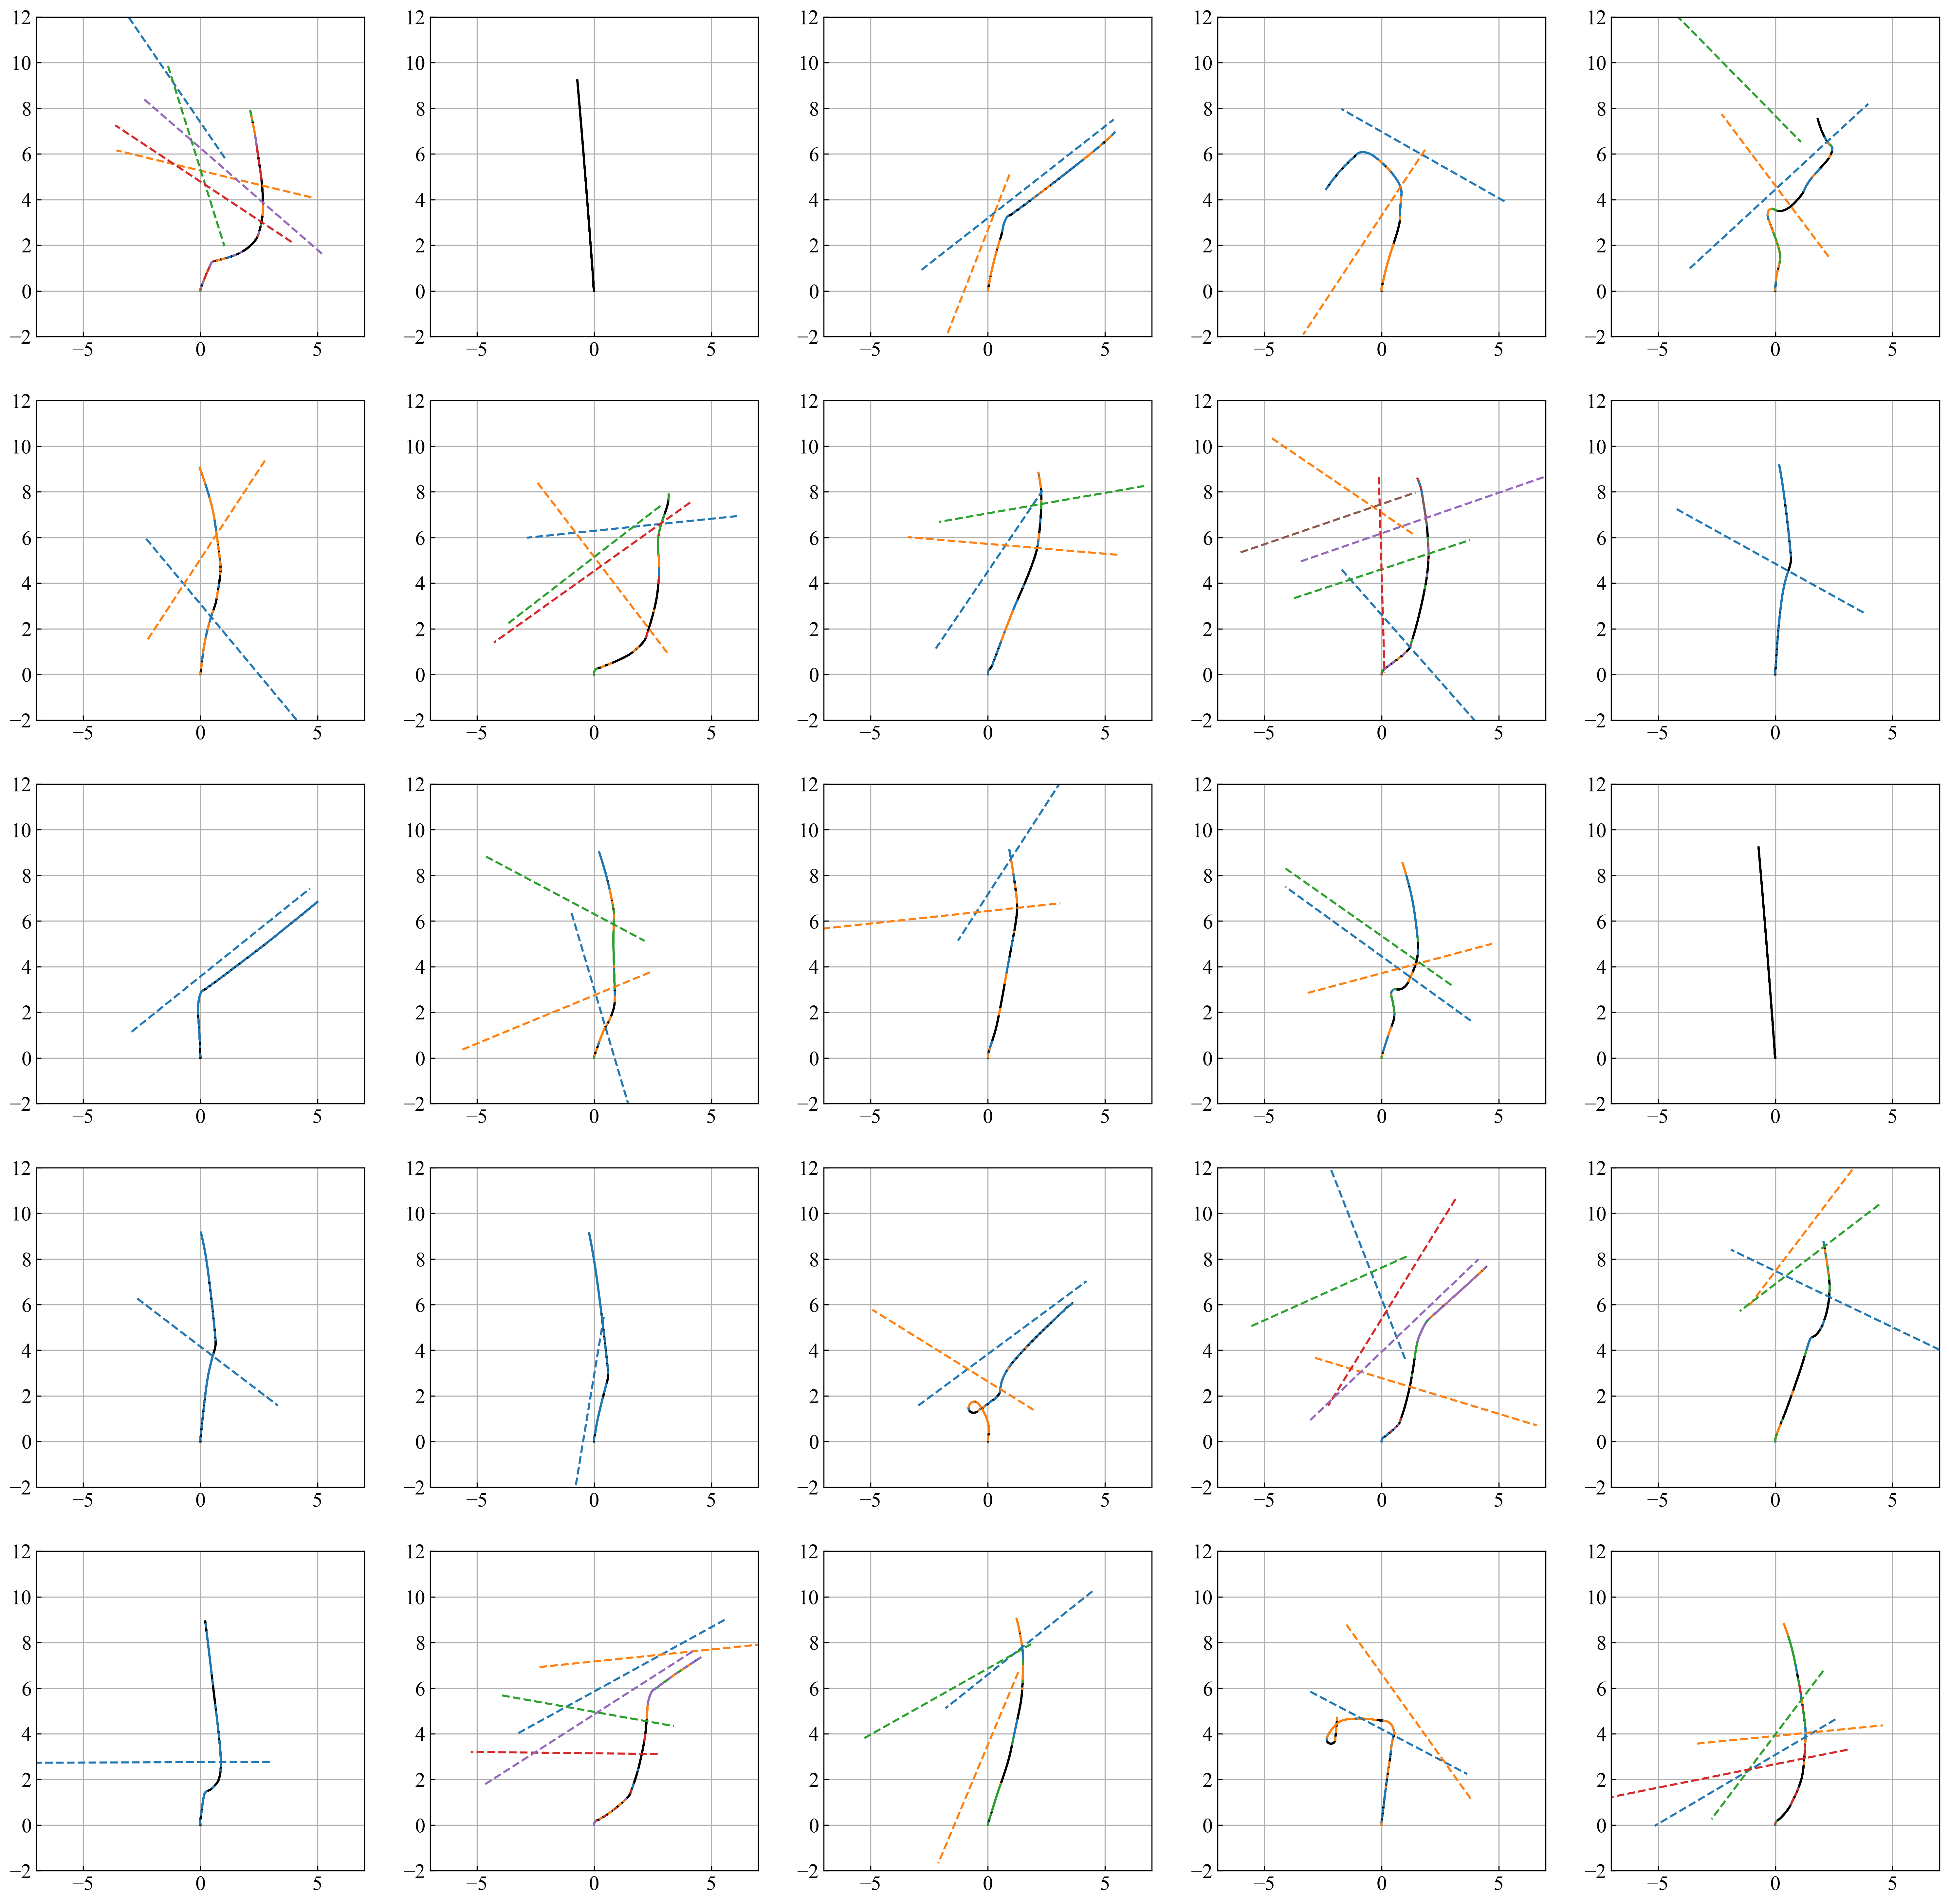

In [8]:
fig, axes = plt.subplots(5,5,figsize=(25,25))

for file_idx, ax in zip(range(25),axes.flatten()):
    df = pd.read_csv(files[file_idx])

    oth_num = int((len(df.columns)-4)/28-1)

    priorities = [
        [
            [
                df['Evalu_wp_action'].iloc[_i]-df[f'Evalu_wp_{0.0:.1f}'].iloc[_i]
            ] + [
                df[f'Evalu{oth_idx:02d}_action'].iloc[_i]-df[f'Evalu{oth_idx:02d}_{0.0:.1f}'].iloc[_i]
                for oth_idx in range(oth_num)
            ]
        ][0]
        for _i in range(1,len(df))
    ]
    priorities_idx = np.argmax(priorities,axis=-1)


    cmap = plt.get_cmap('tab10')
    marker_size=0.5
    # axes[0]
    own_x = np.array(df['own_x'].values)
    own_y = np.array(df['own_y'].values)
    for _idx in range(oth_num+1):
        ax.plot(
            [
                own_x[:-1][priorities_idx==_idx],
                own_x[1:][priorities_idx==_idx],
            ],
            [
                own_y[:-1][priorities_idx==_idx],
                own_y[1:][priorities_idx==_idx],
            ],
            color=(0,0,0) if _idx==0 else cmap((_idx-1)/10),
            zorder=1
        )

    # for i in np.linspace(0,len(df)-1,11).astype('int')[1:]:
    #     ax.add_patch(
    #         plt.Polygon(
    #             [
    #                 [
    #                     df['own_x'].iloc[i] + marker_size*(
    #                         _x*np.cos(-np.radians(df['own_hdg'].iloc[i]))
    #                         - _y*np.sin(-np.radians(df['own_hdg'].iloc[i]))
    #                     ),
    #                     df['own_y'].iloc[i] + marker_size*(
    #                         _x*np.sin(-np.radians(df['own_hdg'].iloc[i]))
    #                         + _y*np.cos(-np.radians(df['own_hdg'].iloc[i]))
    #                     ),
    #                 ]
    #                 for _x, _y in zip(
    #                     [-0.3, 0.0, 0.3],
    #                     [-0.5, 0.5,-0.5]
    #                 )
    #             ], ec=(0,0,0) if priorities_idx[i-1]==0 else cmap((priorities_idx[i-1]-1)/10),
    #             fc='white', zorder=2
    #         )
    #     )
    for oth_idx in range(oth_num):
        ax.plot(
            df[f'oth{oth_idx:02d}_x'],
            df[f'oth{oth_idx:02d}_y'],
            color=cmap(oth_idx/10), zorder=1, linestyle='dashed'
        )
        # for i in np.linspace(0,len(df)-1,11).astype('int')[1:]:
        #     ax.add_patch(
        #         plt.Polygon(
        #             [
        #                 [
        #                     df[f'oth{oth_idx:02d}_x'].iloc[i] + marker_size*(
        #                         _x*np.cos(-np.radians(df[f'oth{oth_idx:02d}_hdg'].iloc[i]))
        #                         - _y*np.sin(-np.radians(df[f'oth{oth_idx:02d}_hdg'].iloc[i]))
        #                     ),
        #                     df[f'oth{oth_idx:02d}_y'].iloc[i] + marker_size*(
        #                         _x*np.sin(-np.radians(df[f'oth{oth_idx:02d}_hdg'].iloc[i]))
        #                         + _y*np.cos(-np.radians(df[f'oth{oth_idx:02d}_hdg'].iloc[i]))
        #                     ),
        #                 ]
        #                 for _x, _y in zip(
        #                     [-0.3, 0.0, 0.3],
        #                     [-0.5, 0.5,-0.5]
        #                 )
        #             ], ec=cmap(oth_idx/10), fc='white', zorder=2
        #         )
        #     )
    ax.set_xlim(-7,7)
    ax.set_ylim(-2,12)
    ax.grid()